Análisis energético en Colombia

Limpieza de datos

In [5]:
import pandas as pd

In [31]:
path = 'D:\\New folder (5)\\CSV\\Generacion_(kWh).xlsx'
df = pd.read_excel(path, skiprows=2, sheet_name="Generacion_(kWh)")

print(df.isna().sum())
print(df.duplicated().sum())

df['produccion_diaria'] = df['0'] + df['1'] + df['2'] + df['3'] + df['4'] + df['5'] + df['6'] + df['7'] + df['8'] + df['9'] + df['10'] + df['11'] + df['12'] + df['13'] + df['14'] + df['15'] + df['16'] + df['17'] + df['18'] + df['19'] + df['20'] + df['21'] + df['22'] + df['23']
df.to_csv('df_clean.csv', index = False)

Fecha              0
Recurso            0
Código Recurso     0
Tipo Generación    0
Combustible        0
Código Agente      0
Tipo Despacho      0
Es Menor           0
Clasificación      0
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
10                 0
11                 0
12                 0
13                 0
14                 0
15                 0
16                 0
17                 0
18                 0
19                 0
20                 0
21                 0
22                 0
23                 0
Version            0
dtype: int64
0


In [32]:
path2 = 'D:\\New folder (5)\\CSV\\Listado_Recursos_Generacion.xlsx'
df_location = pd.read_excel(path2, skiprows=3, sheet_name="Listado_Recursos_Generacion")
path3 = 'df_clean.csv'
df_clean = pd.read_csv(path3)

df_complete = df_clean.merge(
    df_location[["Código SIC", "Municipio", "Departamento"]],
    left_on='Código Recurso',
    right_on='Código SIC',
    how='left'
)

df_complete.to_csv('df_complete.csv', index = False)

In [33]:
path4 = 'D:\\New folder (5)\\df_complete.csv'
df_dirty = pd.read_csv(path4)

df_dirty.drop(columns=['Código Recurso', 'Código Agente', 'Tipo Despacho', 'Es Menor','Version','Código SIC'], inplace=True)
df_dirty.dropna(inplace=True)
df_dirty.to_csv('df_final.csv', index = False)

In [34]:
path5 = 'D:\\New folder (5)\\df_final.csv'
df_final = pd.read_csv(path5)

print(f'{df_final.describe()}')
print(df_final.info())

                  0             1             2             3             4  \
count  1.020240e+05  1.020240e+05  1.020240e+05  1.020240e+05  1.020240e+05   
mean   3.076153e+04  2.973099e+04  2.895446e+04  2.853319e+04  2.880823e+04   
std    1.096956e+05  1.084615e+05  1.066781e+05  1.054303e+05  1.065111e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    6.750600e+02  6.339850e+02  6.233950e+02  6.177600e+02  6.253800e+02   
75%    9.086100e+03  8.622307e+03  8.514050e+03  8.419475e+03  8.510513e+03   
max    1.244378e+06  1.243983e+06  1.243831e+06  1.245095e+06  1.245322e+06   

                  5             6             7             8             9  \
count  1.020240e+05  1.020240e+05  1.020240e+05  1.020240e+05  1.020240e+05   
mean   2.963736e+04  3.001862e+04  3.162046e+04  3.328775e+04  3.438773e+04   
std    1.092036e+05  1.082551e+05  1.084712e+05  1.

Análisis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
import geopandas as gpd
import geopy
import folium
from plotly.subplots import make_subplots
from plotly.offline import plot
from geopy.geocoders import Nominatim
from tqdm import tqdm
import time

In [9]:
path5 = 'D:\\New folder (5)\\df_final.csv'
df_final = pd.read_csv(path5)

produccion_por_combustible = df_final.groupby('Combustible')['produccion_diaria'].sum().sort_values(ascending=False)
produccion_por_recurso = df_final.groupby('Recurso')['produccion_diaria'].sum().sort_values(ascending=False)
produccion_por_departamento = df_final.groupby('Departamento')['produccion_diaria'].sum().sort_values(ascending=False)
produccion_por_municipio = df_final.groupby('Municipio')['produccion_diaria'].sum().sort_values(ascending=False)
produccion_por_tipo_generacion = df_final.groupby('Tipo Generación')['produccion_diaria'].sum().sort_values(ascending=False)
print(produccion_por_combustible)
print('\n')
print(produccion_por_recurso)
print('\n')
print(produccion_por_departamento)
print('\n')
print(produccion_por_municipio)
print('\n')
print(produccion_por_tipo_generacion)
print('\n')

Combustible
AGUA           5.449430e+10
CARBON         9.203867e+09
GAS NI         8.921861e+09
GAS            5.570905e+09
RAD SOLAR      3.303363e+09
BAGAZO         8.643092e+08
ACPM           6.958722e+08
VIENTO         1.487920e+08
COMBUSTOLEO    4.777400e+07
BIOGAS         6.073793e+06
GLP            5.160148e+06
BIOMASA        6.414856e+05
JET-A1         0.000000e+00
Name: produccion_diaria, dtype: float64


Recurso
ITUANGO                     6.997692e+09
SAN CARLOS                  5.206096e+09
GUAVIO                      4.599604e+09
SOGAMOSO                    4.139180e+09
TEBSAB CC                   4.035675e+09
                                ...     
COMUNIDAD EL SALVADOR I     1.470999e+04
AGPE SUB LIBERTADOR         6.577150e+03
AGPE FERCH2                 5.944200e+03
COMUNIDAD EL SALVADOR II    4.468600e+03
TERMOCENTRO CC              4.914000e+01
Name: produccion_diaria, Length: 367, dtype: float64


Departamento
ANTIOQUIA             2.832985e+10
CUNDINAMARCA        

In [11]:
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])

df_final['mes'] = df_final['Fecha'].dt.month
df_final['dia_semana'] = df_final['Fecha'].dt.day_name()
df_final['semana_año'] = df_final['Fecha'].dt.isocalendar().week
df_final['trimestre'] = df_final['Fecha'].dt.quarter
df_final['dia_del_mes'] = df_final['Fecha'].dt.day

C:\Users\Asus\AppData\Local\Temp\ipykernel_15972\3910967817.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Asus\AppData\Local\Temp\ipykernel_15972\3910967817.py:8: UserWarning:


The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15972\3910967817.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



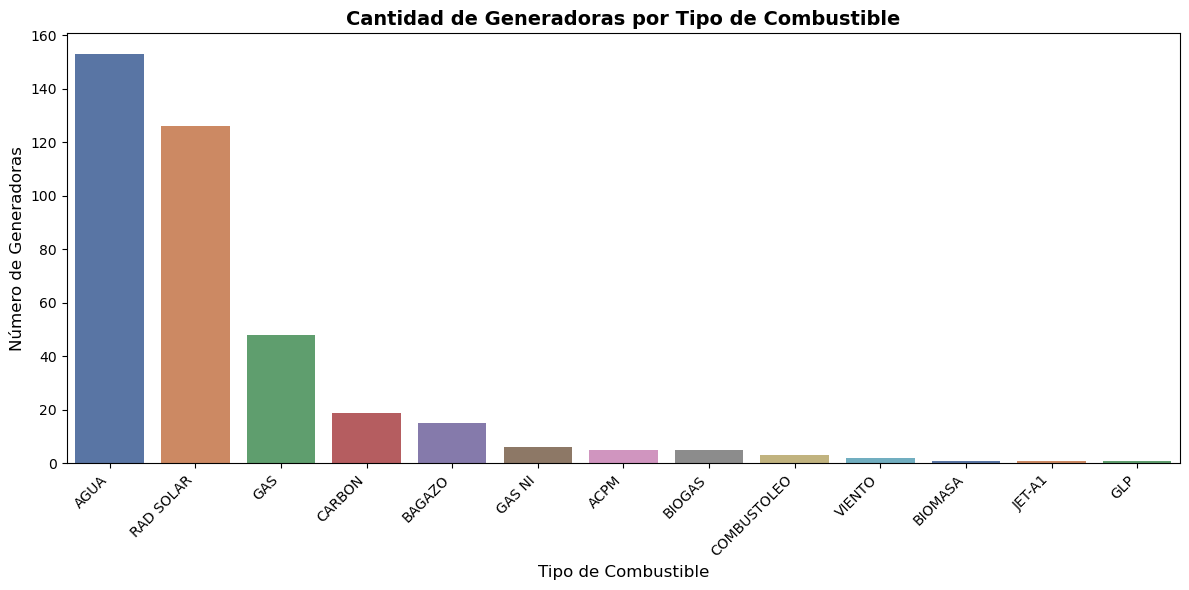

In [12]:
# se cuenta de manera unica cada recurso por tipo de combustible
combustibles_count = df_final.groupby('Combustible')['Recurso'].nunique().sort_values(ascending=False)

#El grafico de barras con matplotlib y seaborn
fig, ax = plt.subplots(figsize=(12, 6))#Tamaño del grafico
palette = sns.color_palette("deep")#Paleta de colores para el grafico

sns.barplot(x=combustibles_count.index, y=combustibles_count.values, ax=ax, palette=palette)#es cogemos el tipo de grafico, Grafico de barras
ax.set_title('Cantidad de Generadoras por Tipo de Combustible', fontsize=14, fontweight='bold')#Titulo del grafico
ax.set_xlabel('Tipo de Combustible', fontsize=12)#Etiqueta del eje x
ax.set_ylabel('Número de Generadoras', fontsize=12)#Etiqueta del eje y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')#Rotacion de las etiquetas del eje x para mejor visibilidad

plt.tight_layout()#Ajuste del diseño para evitar recortes
plt.show()#Mostramos el griafco

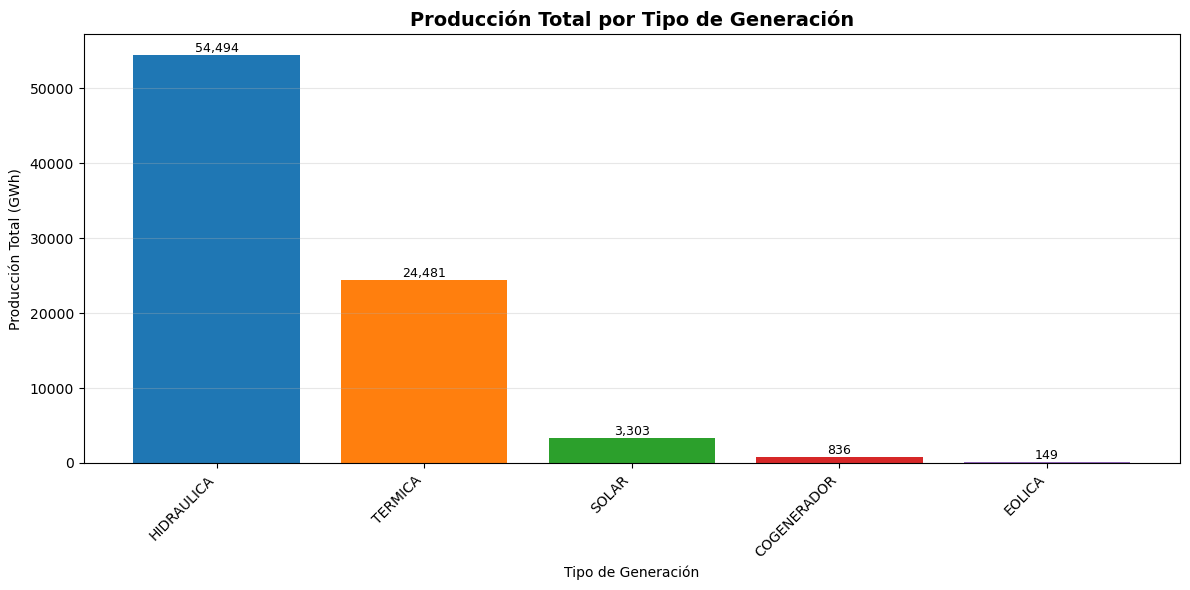

In [13]:
df_final['produccion_diaria_GWh'] = df_final['produccion_diaria'] / 1e6
plt.figure(figsize=(12, 6))
produccion_tipo = df_final.groupby('Tipo Generación')['produccion_diaria_GWh'].sum().sort_values(ascending=False)
bars = plt.bar(produccion_tipo.index, produccion_tipo.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Producción Total por Tipo de Generación', fontsize=14, fontweight='bold')
plt.ylabel('Producción Total (GWh)')
plt.xlabel('Tipo de Generación')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

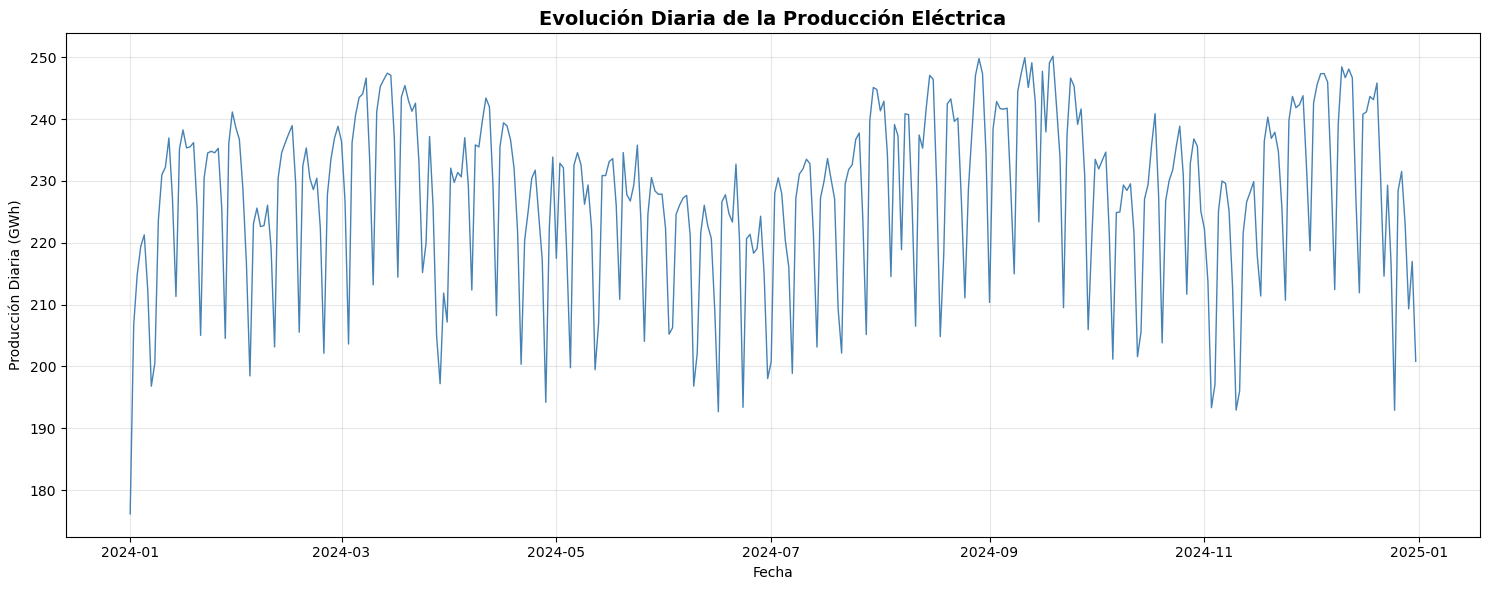

In [14]:
plt.figure(figsize=(15, 6))
produccion_diaria_total = df_final.groupby('Fecha')['produccion_diaria_GWh'].sum()
plt.plot(produccion_diaria_total.index, produccion_diaria_total.values, 
         linewidth=1, color='steelblue')
plt.title('Evolución Diaria de la Producción Eléctrica', fontsize=14, fontweight='bold')
plt.ylabel('Producción Diaria (GWh)')
plt.xlabel('Fecha')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

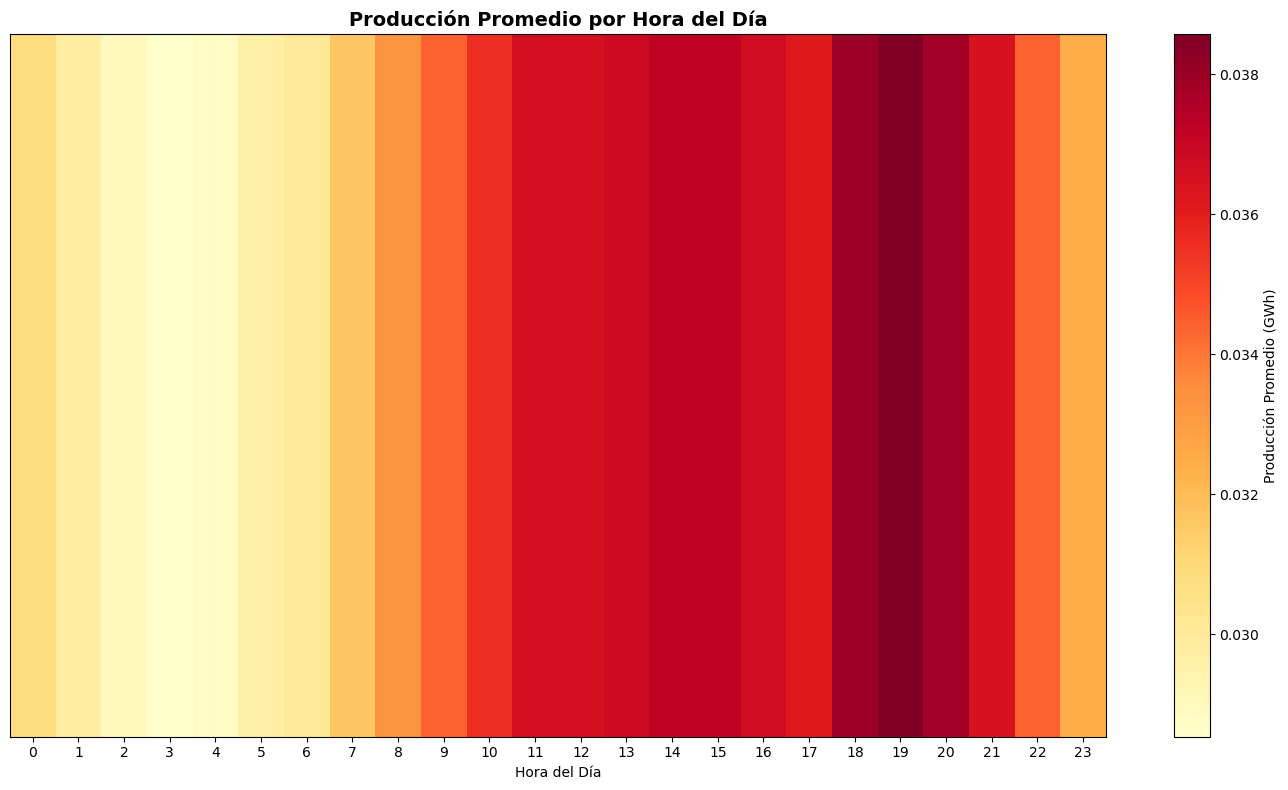

In [16]:
columnas_horarias = ['0','1','2','3','4','5','6','7','8','9','10','11','12',
                    '13','14','15','16','17','18','19','20','21','22','23','produccion_diaria']

for columna in columnas_horarias:
    if columna in df_final.columns:
        df_final[f'{columna}_GWh'] = df_final[columna] / 1e6

horas_columns = [f'{j}_GWh' for j in range(24)]
produccion_promedio_hora = df_final[horas_columns].mean()

plt.figure(figsize=(14, 8))
plt.imshow([produccion_promedio_hora.values], cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Producción Promedio (GWh)')
plt.title('Producción Promedio por Hora del Día', fontsize=14, fontweight='bold')
plt.xlabel('Hora del Día')
plt.yticks([])
plt.xticks(range(24))
plt.tight_layout()
plt.show()

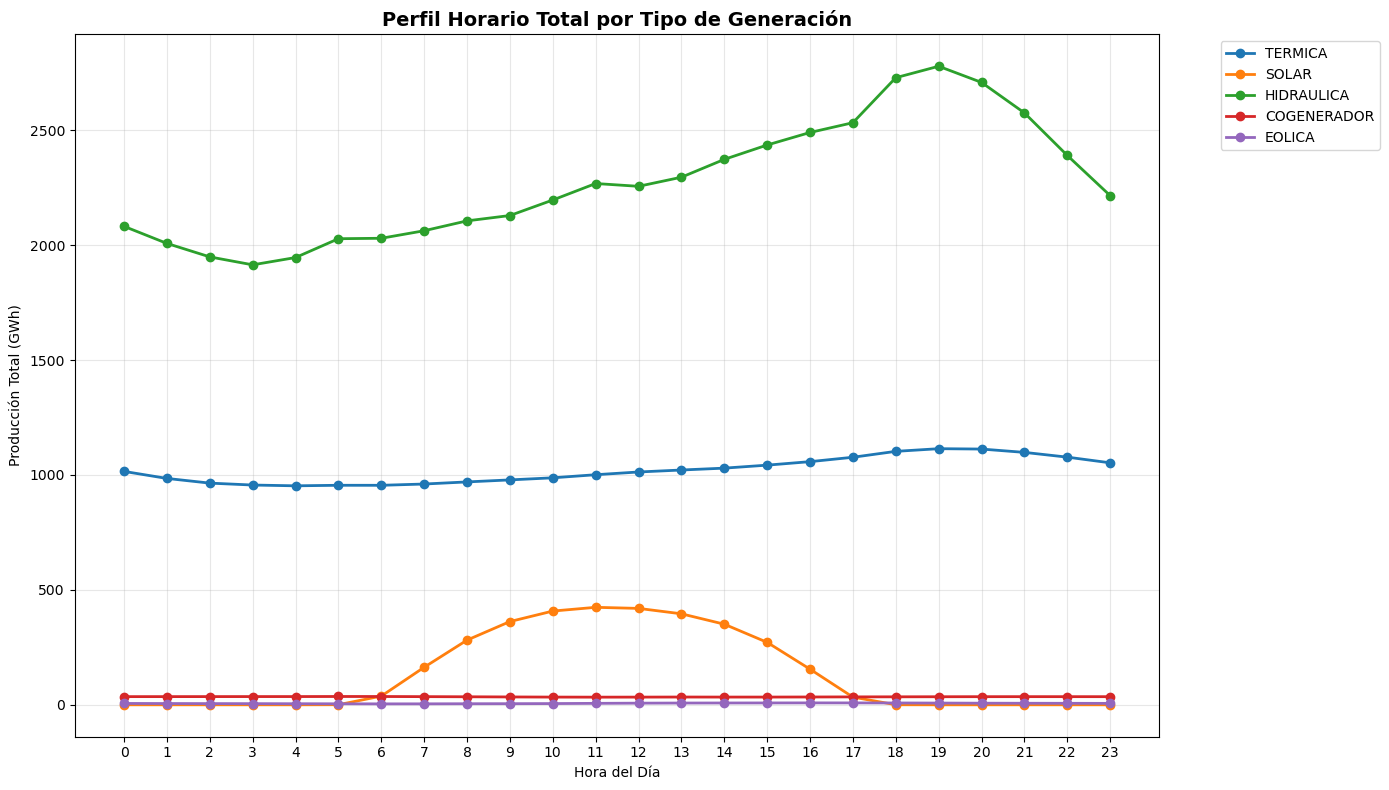

In [17]:
horas_columns = [str(i) for i in range(24)]
plt.figure(figsize=(14, 8))
tipos_generacion = df_final['Tipo Generación'].unique()
for i, tipo in enumerate(tipos_generacion):
    df_tipo = df_final[df_final['Tipo Generación'] == tipo]
    perfil_horario_kwh = df_tipo[horas_columns].sum()
    perfil_horario_gwh = perfil_horario_kwh / 1_000_000  # Convertir a GWh
    plt.plot(range(24), perfil_horario_gwh.values, marker='o', label=tipo, linewidth=2)
plt.title('Perfil Horario Total por Tipo de Generación', fontsize=14, fontweight='bold')
plt.ylabel('Producción Total (GWh)')
plt.xlabel('Hora del Día')
plt.xticks(range(0, 24))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

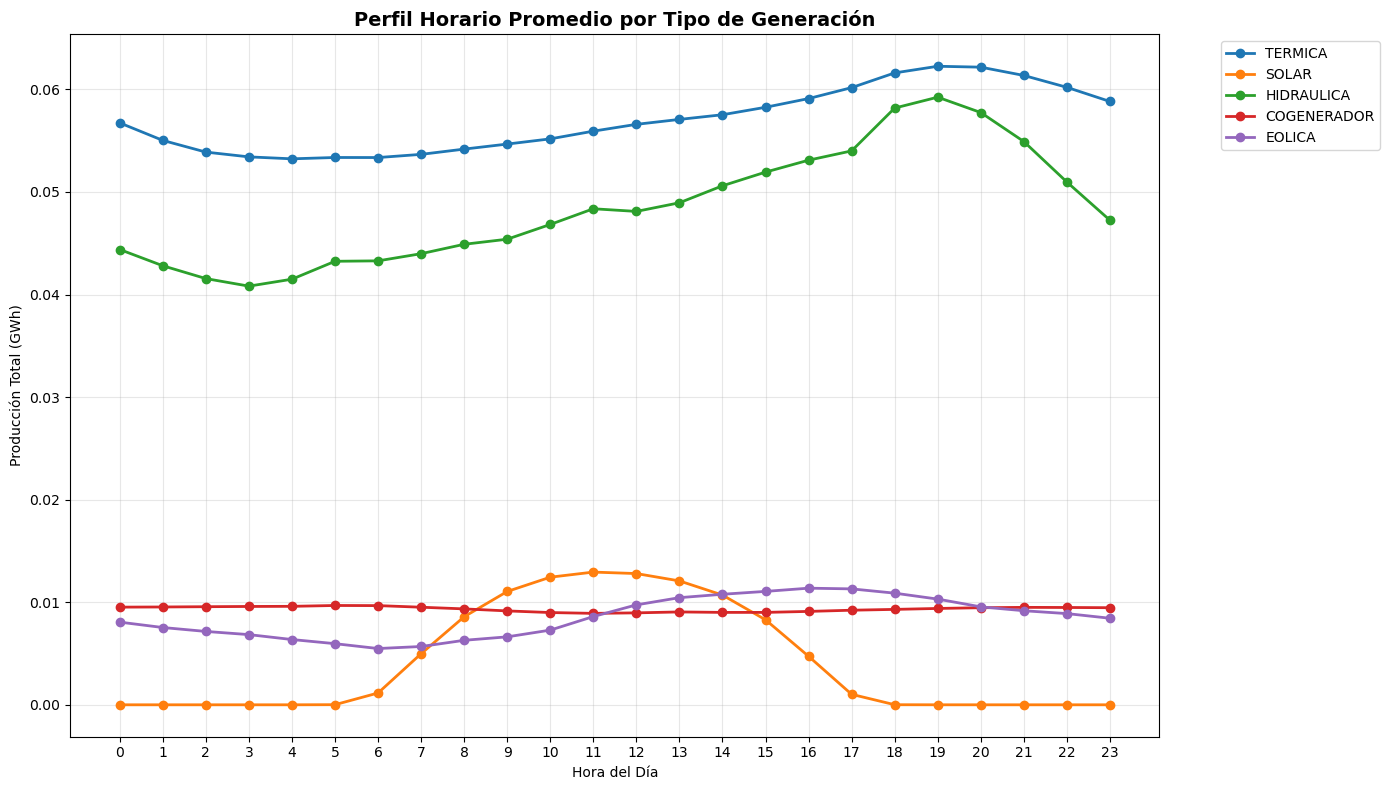

In [18]:
horas_columns = [str(i) for i in range(24)]
plt.figure(figsize=(14, 8))
tipos_generacion = df_final['Tipo Generación'].unique()
for i, tipo in enumerate(tipos_generacion):
    df_tipo = df_final[df_final['Tipo Generación'] == tipo]
    perfil_horario_kwh = df_tipo[horas_columns].mean()
    perfil_horario_gwh = perfil_horario_kwh / 1_000_000  # Convertir a GWh
    plt.plot(range(24), perfil_horario_gwh.values, marker='o', label=tipo, linewidth=2)
plt.title('Perfil Horario Promedio por Tipo de Generación', fontsize=14, fontweight='bold')
plt.ylabel('Producción Total (GWh)')
plt.xlabel('Hora del Día')
plt.xticks(range(0, 24))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

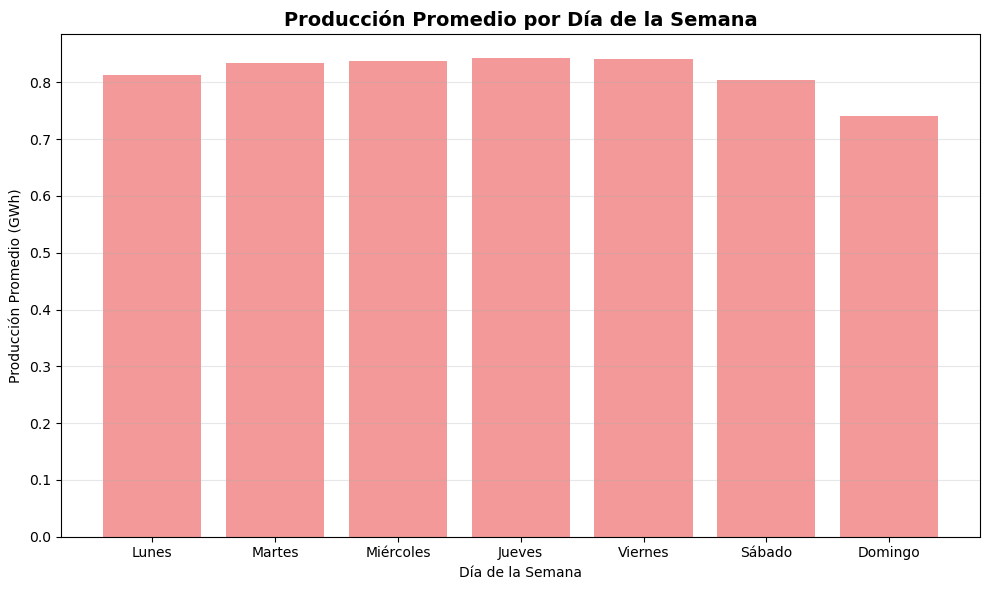

In [19]:
plt.figure(figsize=(10, 6))
produccion_dia_semana = df_final.groupby('dia_semana')['produccion_diaria_GWh'].mean()
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_esp = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
produccion_dia_semana = produccion_dia_semana.reindex(dias_orden)
plt.bar(dias_esp, produccion_dia_semana.values, color='lightcoral', alpha=0.8)
plt.title('Producción Promedio por Día de la Semana', fontsize=14, fontweight='bold')
plt.ylabel('Producción Promedio (GWh)')
plt.xlabel('Día de la Semana')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

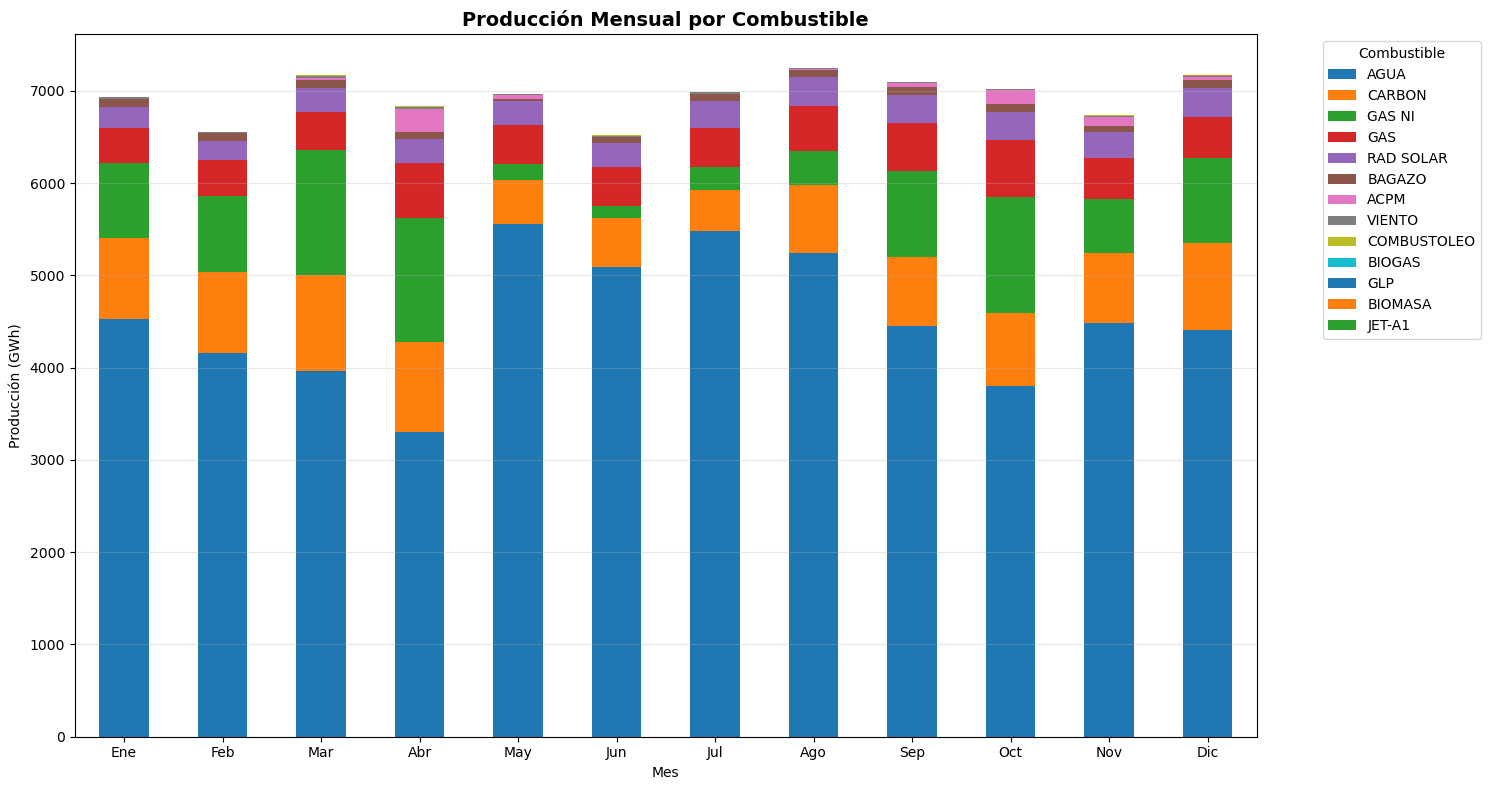

In [20]:
produccion_mes_combustible = df_final.groupby(['mes', 'Combustible'])['produccion_diaria_GWh'].sum().unstack()
top_combustibles = df_final.groupby('Combustible')['produccion_diaria_GWh'].sum().nlargest(13).index
produccion_mes_combustible = produccion_mes_combustible[top_combustibles]
produccion_mes_combustible.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Producción Mensual por Combustible', fontsize=14, fontweight='bold')
plt.ylabel('Producción (GWh)')
plt.xlabel('Mes')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.legend(title='Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [21]:
fig = px.line(df_final.groupby(['Fecha', 'Tipo Generación'])['produccion_diaria_GWh'].sum().reset_index(),
              x='Fecha', y='produccion_diaria_GWh', color='Tipo Generación',
              title='Evolución de Producción por Tipo (Interactivo)')
plot(fig, filename='produccion_por_tipo.html', auto_open=True)


'produccion_por_tipo.html'

In [22]:
produccion_departamento = df_final.groupby('Departamento')['produccion_diaria_GWh'].sum().sort_values(ascending=False)
produccion_municipio = df_final.groupby(['Departamento', 'Municipio'])['produccion_diaria_GWh'].sum().reset_index()
top_departamentos = produccion_departamento.head(25)
top_municipios = produccion_municipio.nlargest(25, 'produccion_diaria_GWh')

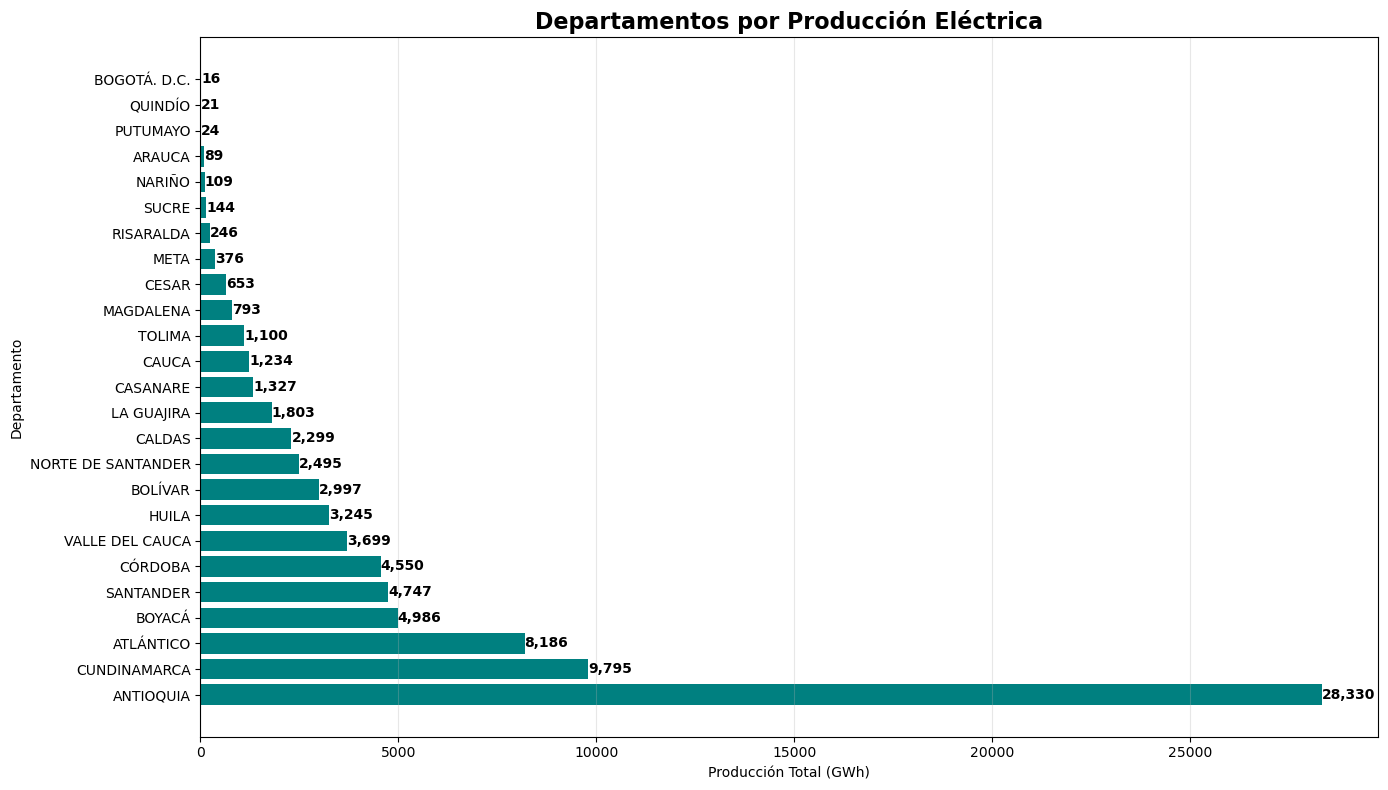

In [23]:
plt.figure(figsize=(14, 8))
bars = plt.barh(top_departamentos.index, top_departamentos.values, color='teal')
plt.title('Departamentos por Producción Eléctrica', fontsize=16, fontweight='bold')
plt.xlabel('Producción Total (GWh)')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:,.0f}', ha='left', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

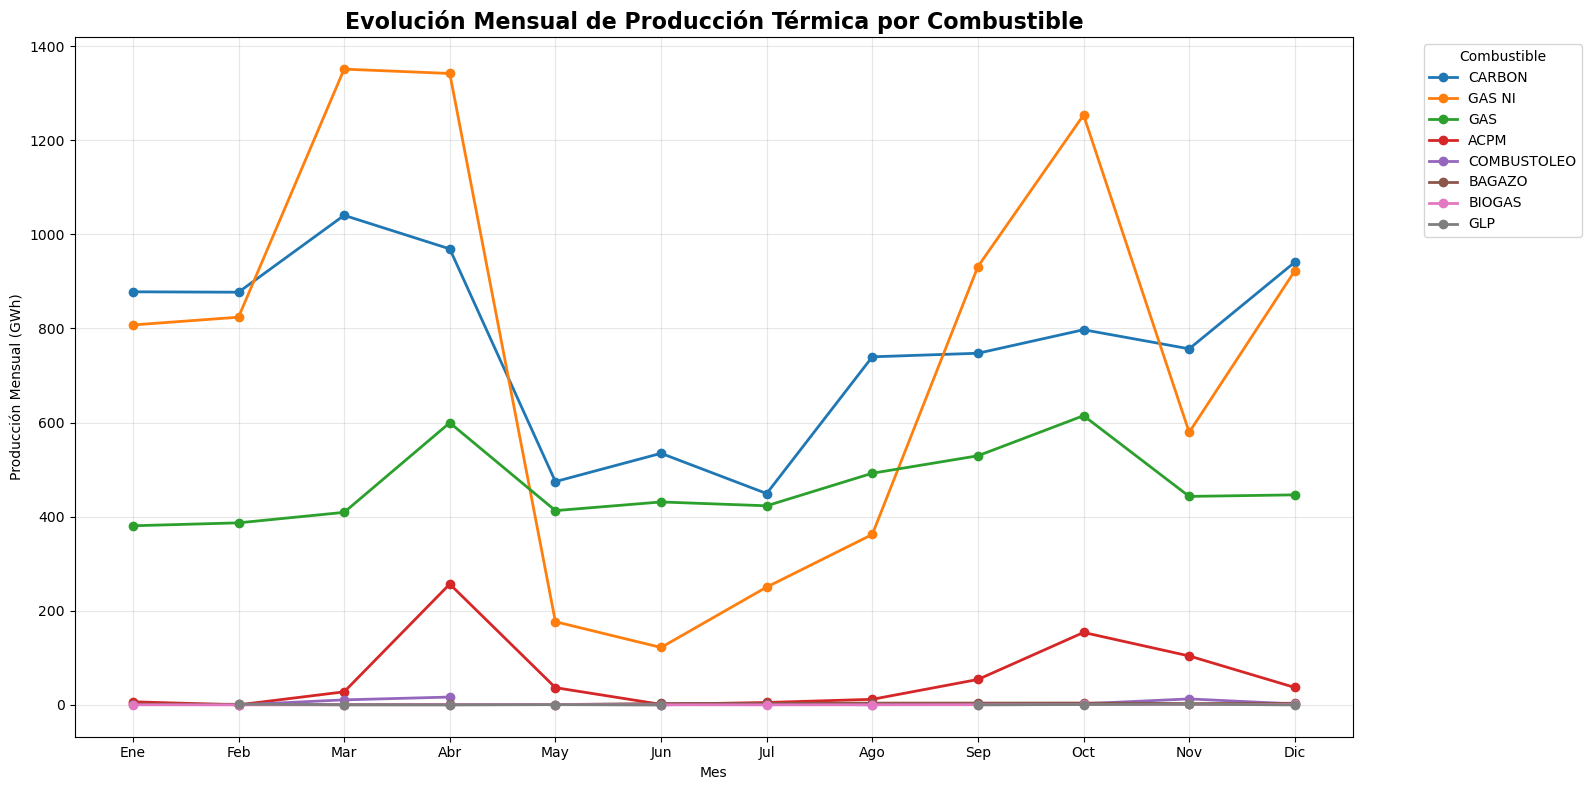

In [24]:
df_termica = df_final[df_final['Tipo Generación'] == 'TERMICA'].copy()
produccion_mensual_combustible = df_termica.groupby(['mes', 'Combustible'])['produccion_diaria_GWh'].sum().unstack()
top_combustibles = df_termica.groupby('Combustible')['produccion_diaria_GWh'].sum().nlargest(8).index
produccion_mensual_combustible = produccion_mensual_combustible[top_combustibles]
plt.figure(figsize=(16, 8))
for combustible in produccion_mensual_combustible.columns:
    plt.plot(produccion_mensual_combustible.index, 
             produccion_mensual_combustible[combustible], 
             marker='o', linewidth=2, markersize=6, label=combustible)
plt.title('Evolución Mensual de Producción Térmica por Combustible', fontsize=16, fontweight='bold')
plt.ylabel('Producción Mensual (GWh)')
plt.xlabel('Mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


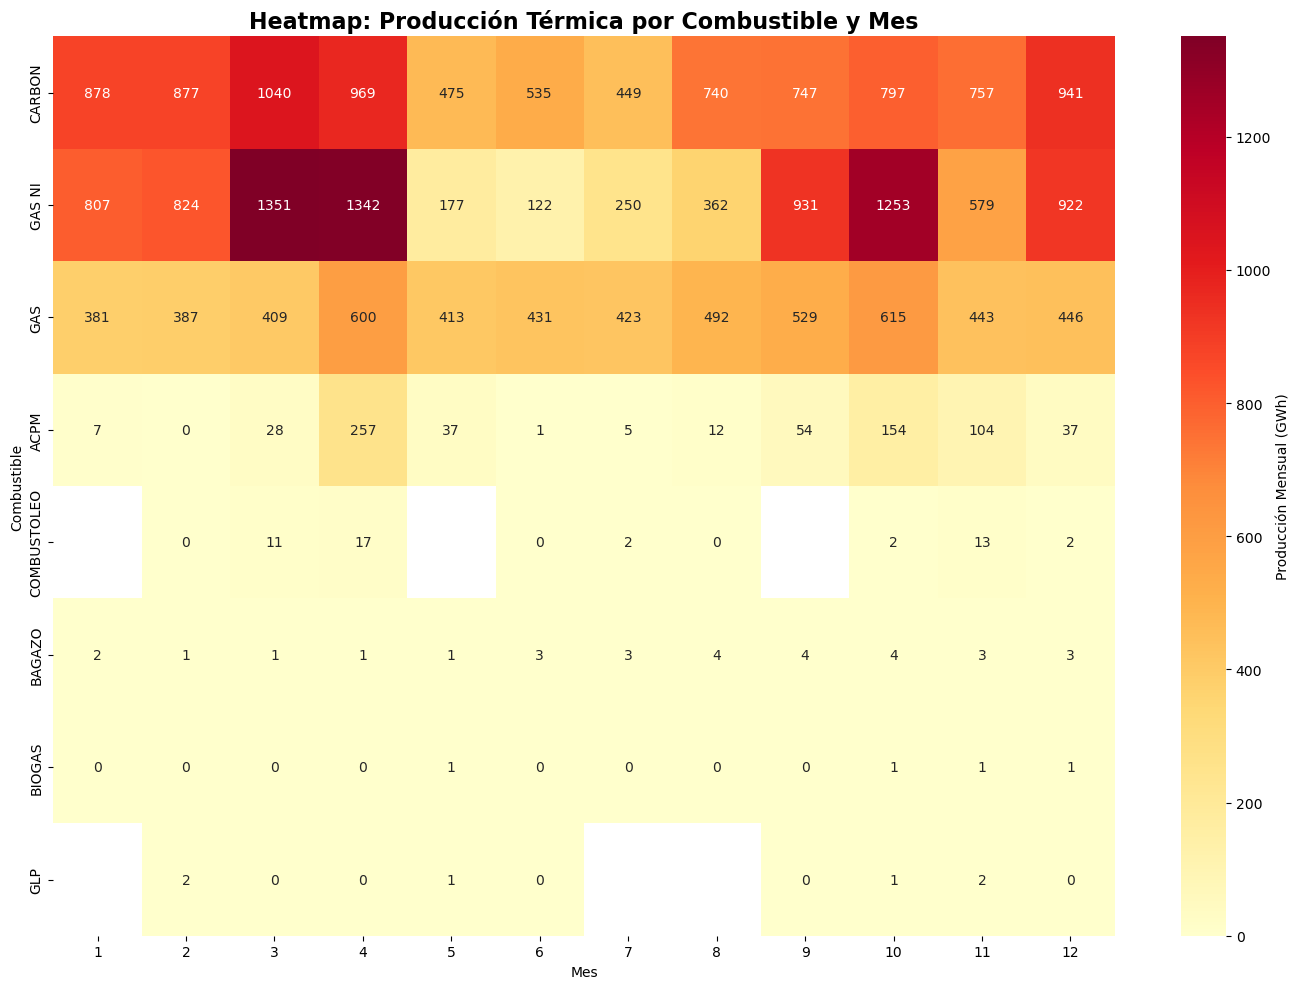

In [25]:
heatmap_data = produccion_mensual_combustible.T
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.0f',
            cbar_kws={'label': 'Producción Mensual (GWh)'})
plt.title('Heatmap: Producción Térmica por Combustible y Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Combustible')
plt.tight_layout()
plt.show()

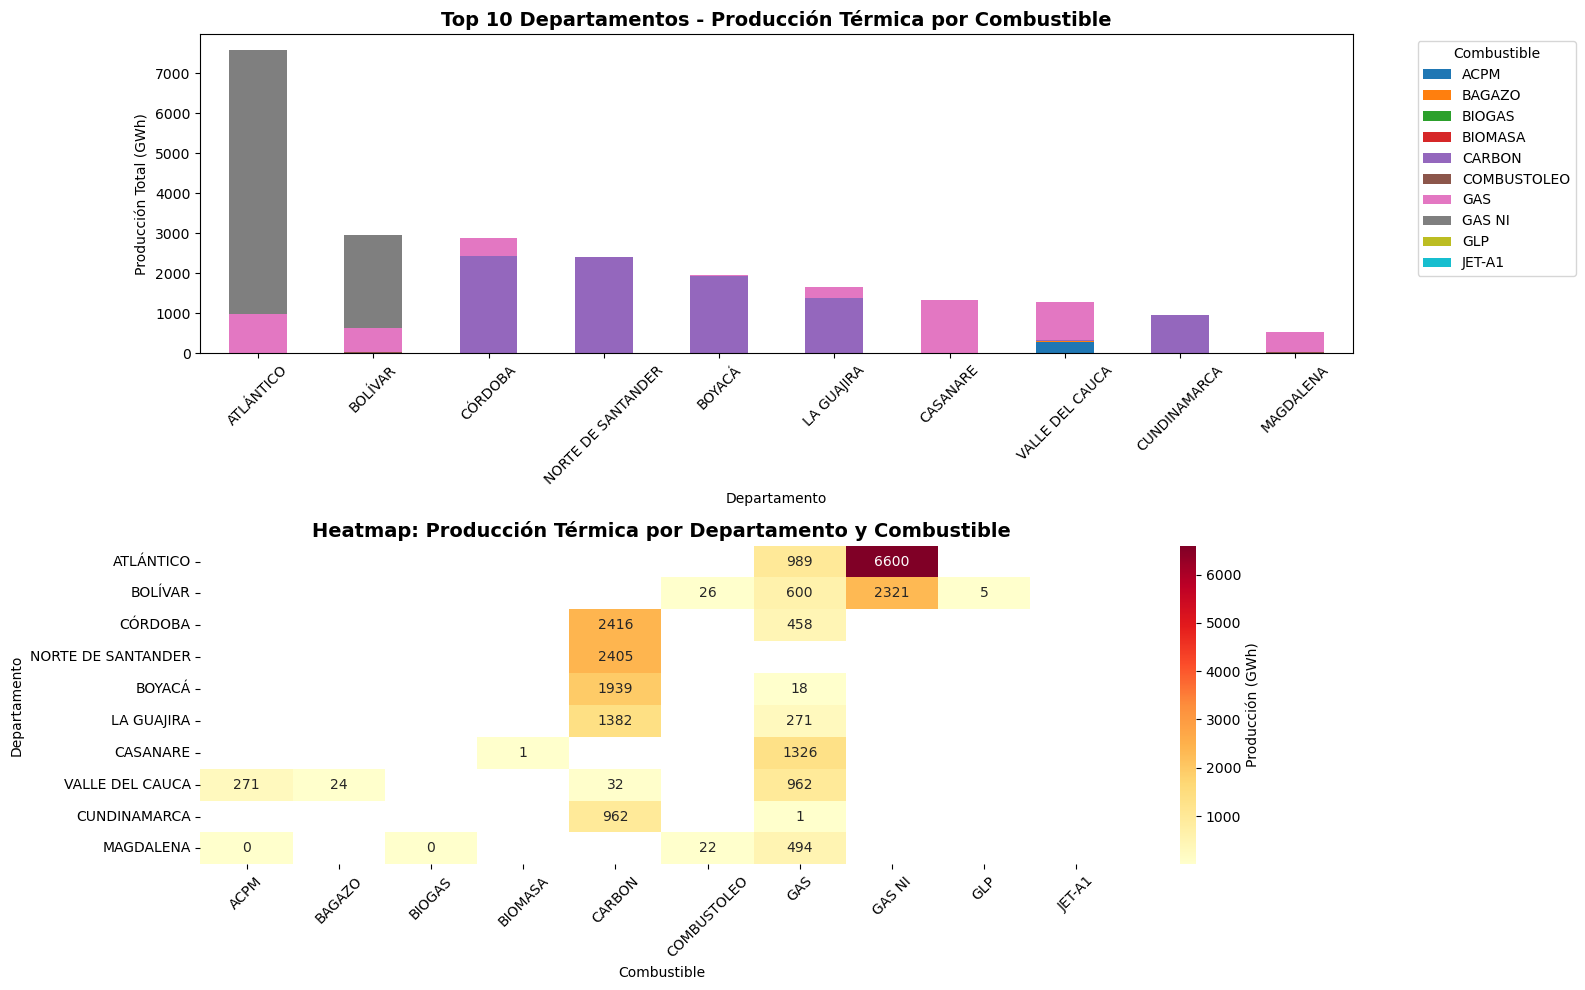

In [26]:
produccion_depto_combustible = df_termica.pivot_table(
    values='produccion_diaria_GWh',
    index='Departamento',
    columns='Combustible',
    aggfunc='sum'
)
top_deptos_termica = df_termica.groupby('Departamento')['produccion_diaria_GWh'].sum().nlargest(10).index
produccion_depto_combustible = produccion_depto_combustible.loc[top_deptos_termica]
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
produccion_depto_combustible.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Top 10 Departamentos - Producción Térmica por Combustible', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Producción Total (GWh)')
axes[0].set_xlabel('Departamento')
axes[0].legend(title='Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)
sns.heatmap(produccion_depto_combustible, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.0f',
            cbar_kws={'label': 'Producción (GWh)'},
            ax=axes[1])
axes[1].set_title('Heatmap: Producción Térmica por Departamento y Combustible', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Combustible')
axes[1].set_ylabel('Departamento')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

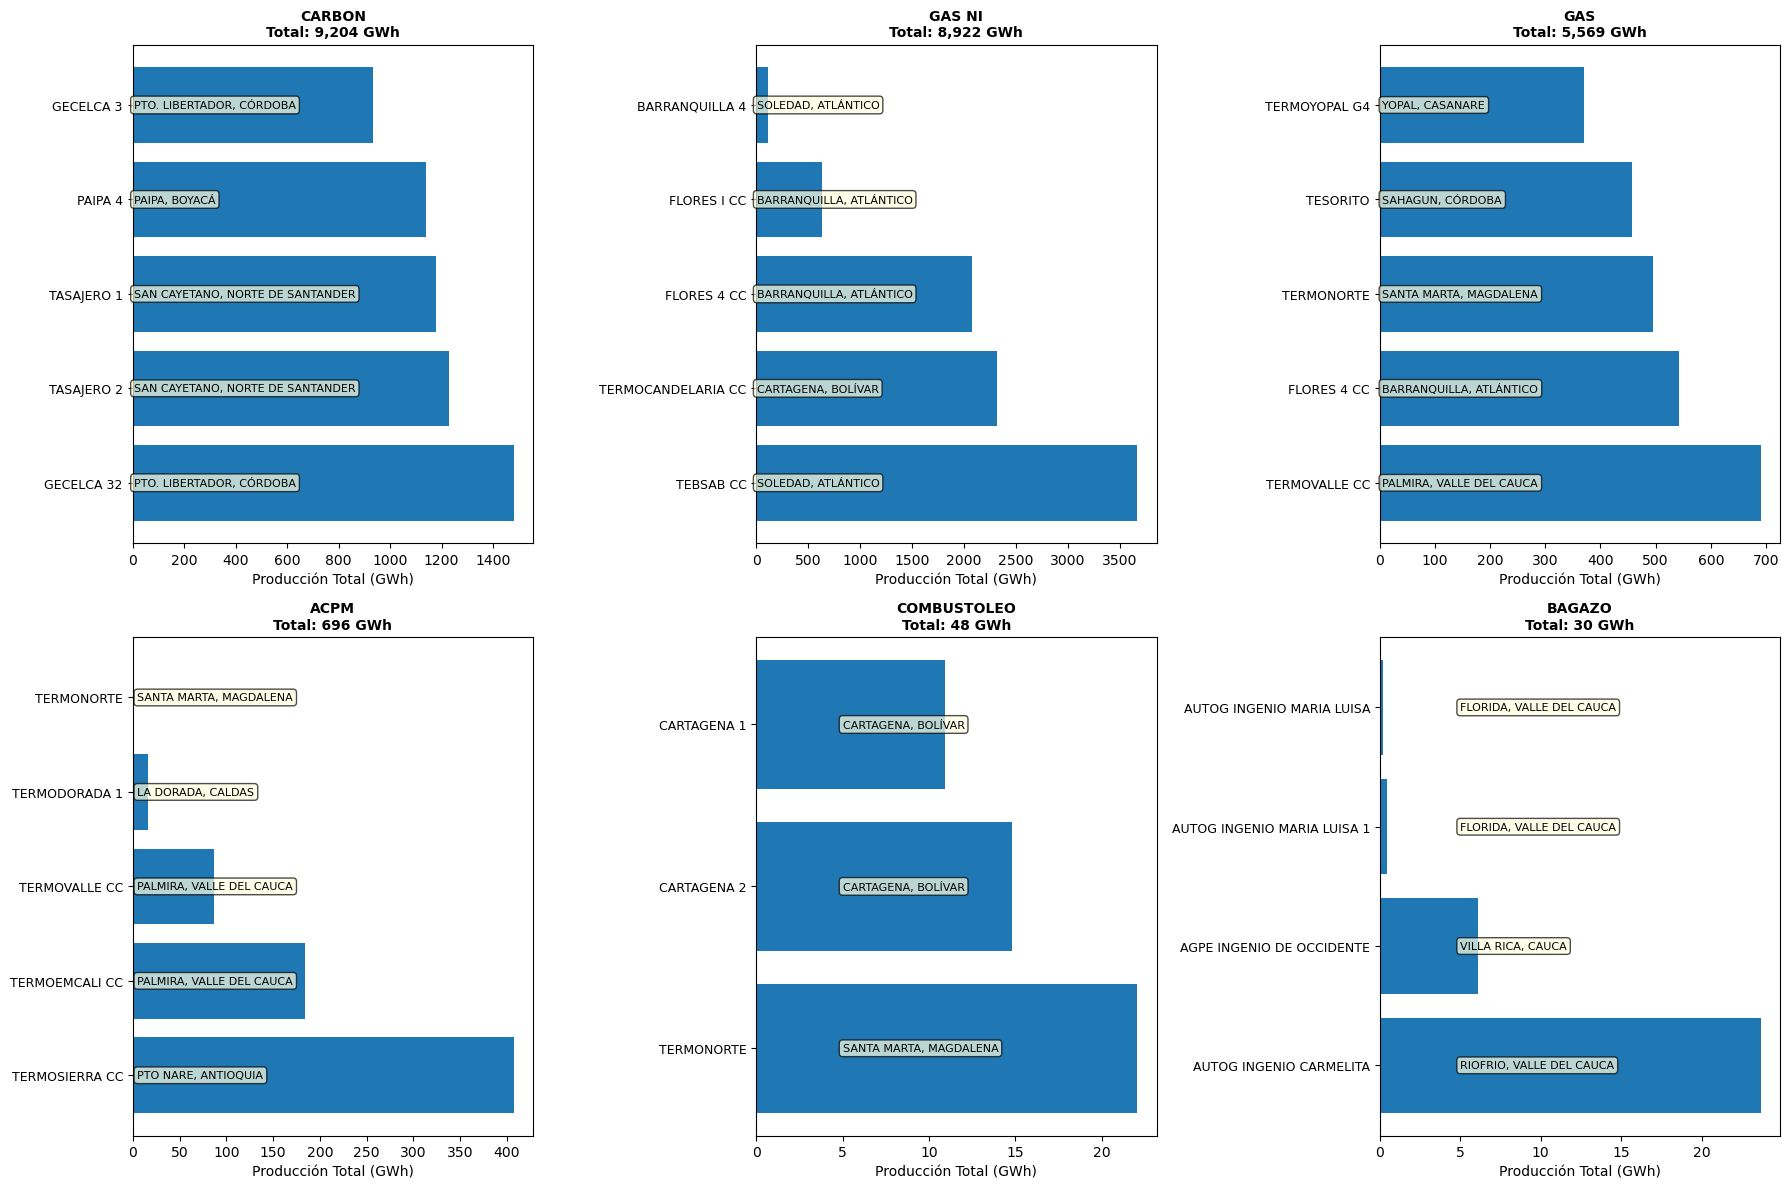

In [27]:
combustibles_principales = df_termica.groupby('Combustible')['produccion_diaria_GWh'].sum().nlargest(6).index
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for idx, combustible in enumerate(combustibles_principales):
    df_combustible = df_termica[df_termica['Combustible'] == combustible]
    top_centrales = df_combustible.groupby('Recurso')['produccion_diaria_GWh'].sum().nlargest(5)
    bars = axes[idx].barh(range(len(top_centrales)), top_centrales.values)
    axes[idx].set_yticks(range(len(top_centrales)))
    axes[idx].set_yticklabels(top_centrales.index, fontsize=9)
    axes[idx].set_title(f'{combustible}\nTotal: {df_combustible["produccion_diaria_GWh"].sum():,.0f} GWh', 
                       fontweight='bold', fontsize=10)
    axes[idx].set_xlabel('Producción Total (GWh)')
    for i, (central, _) in enumerate(top_centrales.items()):
        municipio = df_combustible[df_combustible['Recurso'] == central]['Municipio'].iloc[0]
        depto = df_combustible[df_combustible['Recurso'] == central]['Departamento'].iloc[0]
        axes[idx].text(5, i, f"{municipio}, {depto}", fontsize=8, va='center',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
plt.tight_layout()
plt.show()

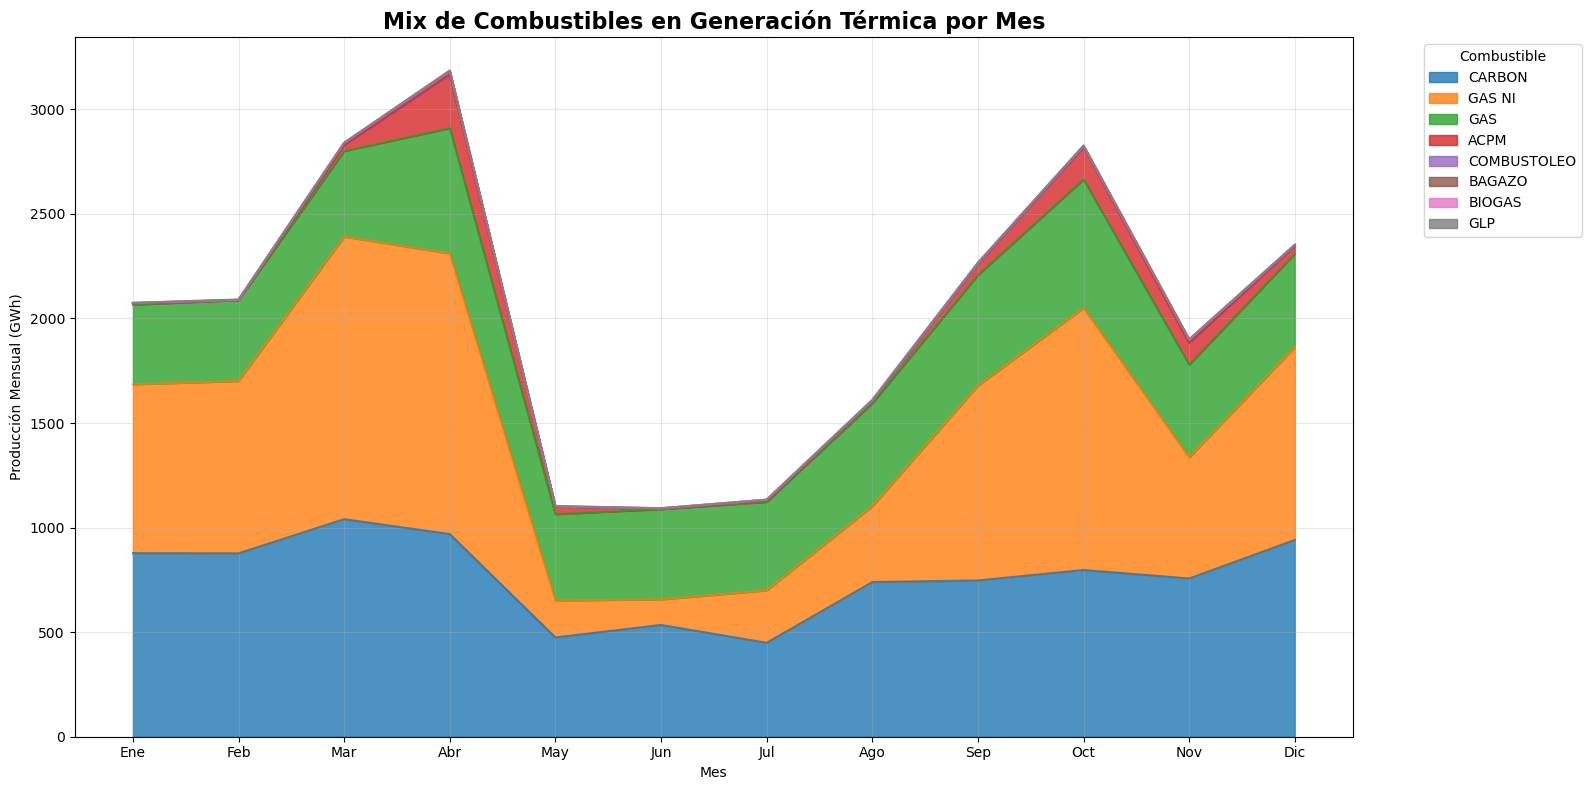

In [28]:
mix_mensual_termico = produccion_mensual_combustible
mix_mensual_termico.plot(kind='area', stacked=True, alpha=0.8, figsize=(16, 8))
plt.title('Mix de Combustibles en Generación Térmica por Mes', fontsize=16, fontweight='bold')
plt.ylabel('Producción Mensual (GWh)')
plt.xlabel('Mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

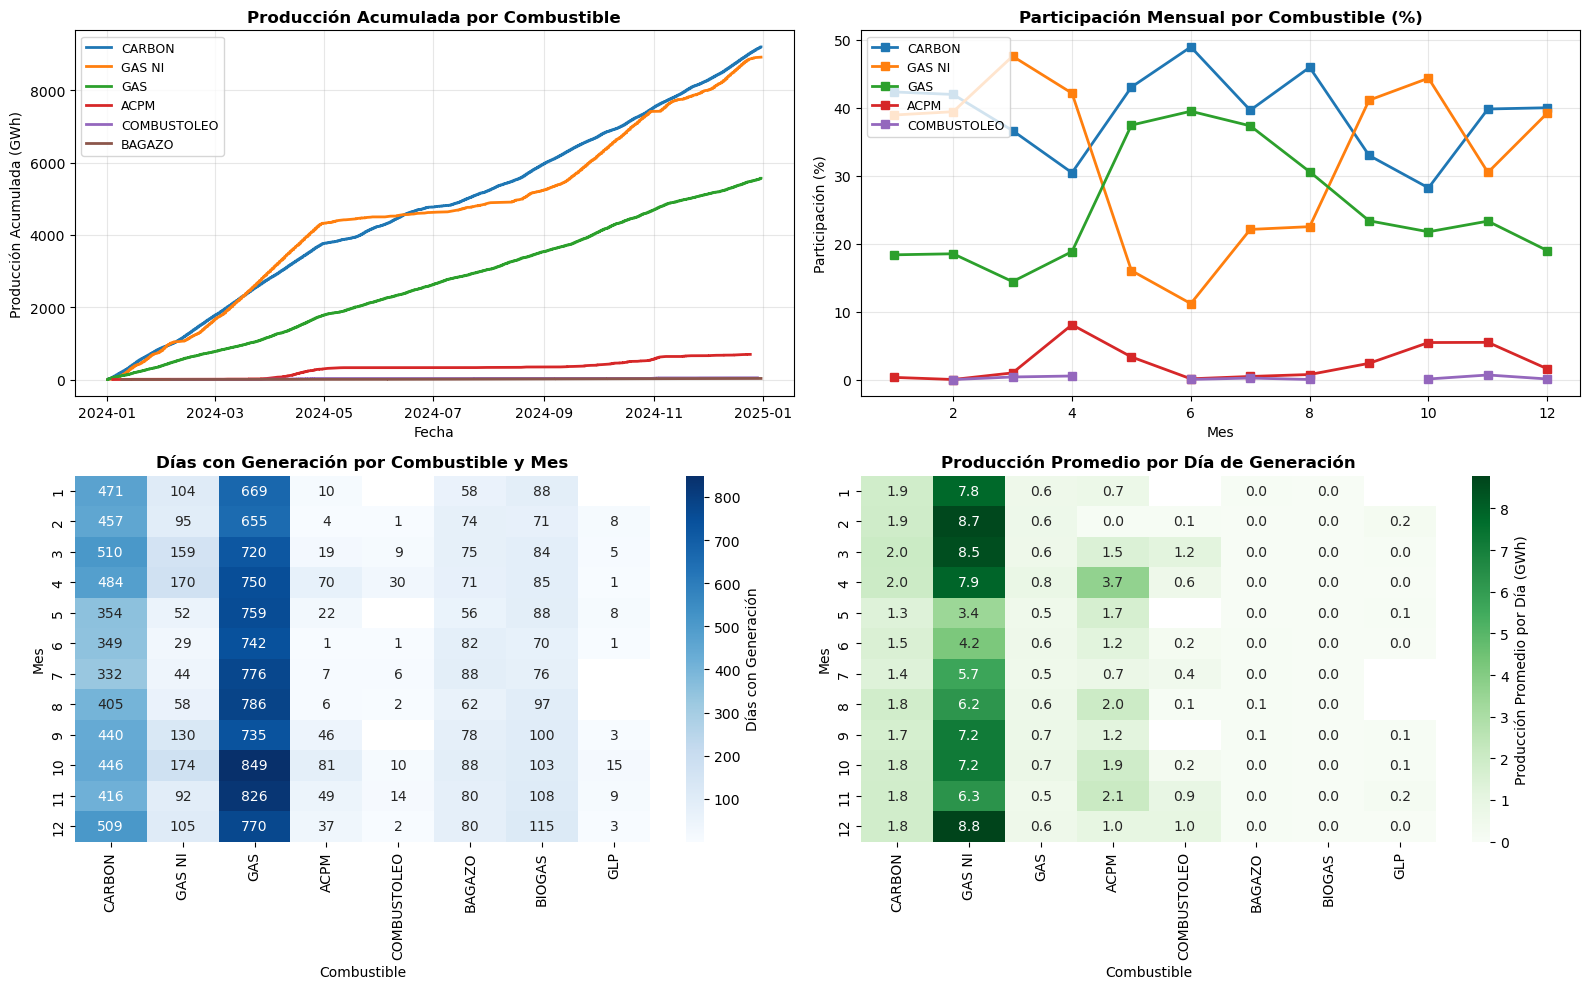

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for combustible in top_combustibles[:6]:
    df_comb = df_termica[df_termica['Combustible'] == combustible].sort_values('Fecha')
    df_comb['Acumulado'] = df_comb['produccion_diaria_GWh'].cumsum()
    axes[0, 0].plot(df_comb['Fecha'], df_comb['Acumulado'], label=combustible, linewidth=2)
axes[0, 0].set_title('Producción Acumulada por Combustible', fontweight='bold')
axes[0, 0].set_ylabel('Producción Acumulada (GWh)')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].legend(loc='upper left', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)
participacion_mensual = produccion_mensual_combustible.div(produccion_mensual_combustible.sum(axis=1), axis=0) * 100
for combustible in participacion_mensual.columns[:5]:
    axes[0, 1].plot(participacion_mensual.index, participacion_mensual[combustible], 
                   marker='s', linewidth=2, label=combustible)
axes[0, 1].set_title('Participación Mensual por Combustible (%)', fontweight='bold')
axes[0, 1].set_ylabel('Participación (%)')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].legend(loc='upper left', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)
dias_generacion = df_termica.groupby(['mes', 'Combustible']).size().unstack()
dias_generacion = dias_generacion[top_combustibles]
sns.heatmap(dias_generacion, cmap='Blues', annot=True, fmt='.0f',
            cbar_kws={'label': 'Días con Generación'}, ax=axes[1, 0])
axes[1, 0].set_title('Días con Generación por Combustible y Mes', fontweight='bold')
axes[1, 0].set_xlabel('Combustible')
axes[1, 0].set_ylabel('Mes')
eficiencia = produccion_mensual_combustible.div(dias_generacion).replace([np.inf, -np.inf], np.nan)
sns.heatmap(eficiencia, cmap='Greens', annot=True, fmt='.1f',
            cbar_kws={'label': 'Producción Promedio por Día (GWh)'}, ax=axes[1, 1])
axes[1, 1].set_title('Producción Promedio por Día de Generación', fontweight='bold')
axes[1, 1].set_xlabel('Combustible')
axes[1, 1].set_ylabel('Mes')
plt.tight_layout()
plt.show()

In [83]:
centrales_unicas = df_final[['Recurso', 'Municipio', 'Departamento', 'Tipo Generación', 'Combustible']].drop_duplicates()
def geocodificar_ubicacion(municipio, departamento, recurso):
    """Obtiene coordenadas de un municipio usando Nominatim"""
    geolocator = Nominatim(user_agent="centrales_electricas_colombia")
    try:
        location = geolocator.geocode(f"{municipio}, {departamento}, Colombia")
        if location:
            return location.latitude, location.longitude
        else:
            location = geolocator.geocode(f"{departamento}, Colombia")
            return location.latitude, location.longitude if location else (None, None)
    except:
        return (None, None)
print("⏳ Geocodificando ubicaciones... Esto puede tomar varios minutos")
centrales_unicas['coordenadas'] = centrales_unicas.apply(
    lambda x: geocodificar_ubicacion(x['Municipio'], x['Departamento'], x['Recurso']), 
    axis=1
)
centrales_unicas['latitud'] = centrales_unicas['coordenadas'].apply(lambda x: x[0] if x else None)
centrales_unicas['longitud'] = centrales_unicas['coordenadas'].apply(lambda x: x[1] if x else None)
print(f"✅ Geocodificación completada. {centrales_unicas['latitud'].notna().sum()}/{len(centrales_unicas)} ubicaciones encontradas")
mapa = folium.Map(location=[4.570868, -74.297333], zoom_start=6)
colores_tipo = {
    'HIDRAULICA': 'blue',
    'TERMICA': 'red',
    'SOLAR': 'orange',
    'EOLICA': 'green',
    'COGENERADOR': 'purple'
}
for _, central in centrales_unicas.dropna(subset=['latitud', 'longitud']).iterrows():
    produccion_total = df_final[df_final['Recurso'] == central['Recurso']]['produccion_diaria_GWh'].sum()
    popup_content = f"""
    <b>{central['Recurso']}</b><br>
    <b>Tipo:</b> {central['Tipo Generación']}<br>
    <b>Combustible:</b> {central['Combustible']}<br>
    <b>Ubicación:</b> {central['Municipio']}, {central['Departamento']}<br>
    <b>Producción total:</b> {produccion_total:,.0f} GWh<br>
    """
    folium.CircleMarker(
        location=[central['latitud'], central['longitud']],
        radius=8 + (produccion_total / 1000),
        popup=folium.Popup(popup_content, max_width=300),
        color=colores_tipo.get(central['Tipo Generación'], 'gray'),
        fill=True,
        fill_color=colores_tipo.get(central['Tipo Generación'], 'gray'),
        fill_opacity=0.7
    ).add_to(mapa)
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 180px; height: 220px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     padding: 10px;">
     <b>🎯 Leyenda</b><br>
     <i class="fa fa-circle" style="color:blue"></i> Hidráulica<br>
     <i class="fa fa-circle" style="color:red"></i> Térmica<br>
     <i class="fa fa-circle" style="color:orange"></i> Solar<br>
     <i class="fa fa-circle" style="color:green"></i> Eólica<br>
     <i class="fa fa-circle" style="color:purple"></i> Cogeneración<br>
     <br><b>Tamaño:</b><br>Producción total
</div>
'''
mapa.get_root().html.add_child(folium.Element(legend_html))
mapa.save('mapa_centrales_electricas_colombia.html')
print("✅ Mapa guardado como 'mapa_centrales_electricas_colombia.html'")
print("📂 Ábrelo en tu navegador para verlo interactivo")

⏳ Geocodificando ubicaciones... Esto puede tomar varios minutos
✅ Geocodificación completada. 385/385 ubicaciones encontradas
✅ Geocodificación completada. 385/385 ubicaciones encontradas
✅ Mapa guardado como 'mapa_centrales_electricas_colombia.html'
📂 Ábrelo en tu navegador para verlo interactivo
✅ Mapa guardado como 'mapa_centrales_electricas_colombia.html'
📂 Ábrelo en tu navegador para verlo interactivo


In [30]:
"""Genera un resumen del dataset con la estructura actual"""
print("RESUMEN - DATOS DIARIOS")
print("=" * 50)
print(f"Período: {df_final['Fecha'].min().strftime('%d/%m/%Y')} a {df_final['Fecha'].max().strftime('%d/%m/%Y')}")
print(f"Días analizados: {df_final['Fecha'].nunique()}")
print(f"Producción total: {df_final['produccion_diaria_GWh'].sum():,.1f} GWh")
print(f"Producción promedio diaria: {df_final['produccion_diaria_GWh'].mean():.1f} GWh")
print(f"Centrales eléctricas: {df_final['Recurso'].nunique()}")
print("\n Tipos de generación:")
for tipo, prod in df_final.groupby('Tipo Generación')['produccion_diaria_GWh'].sum().items():
    porcentaje = (prod / df_final['produccion_diaria_GWh'].sum()) * 100
    print(f"  - {tipo}: {prod:,.1f} GWh ({porcentaje:.1f}%)")
def resumen_municipal_completo(df_final, top_n=10):
    """Genera un resumen ejecutivo del análisis municipal"""
    
    print("🏙️  RESUMEN EJECUTIVO - ANÁLISIS MUNICIPAL")
    print("=" * 70)
    num_municipios = df_final['Municipio'].nunique()
    num_departamentos = df_final['Departamento'].nunique()
    total_prod = df_final['produccion_diaria_GWh'].sum()
    
    print(f"📊 ESTADÍSTICAS GENERALES:")
    print(f"   • Municipios productores: {num_municipios}")
    print(f"   • Departamentos involucrados: {num_departamentos}")
    print(f"   • Producción total nacional: {total_prod:,.0f} GWh")
    top_municipios = df_final.groupby(['Departamento', 'Municipio'])['produccion_diaria_GWh'].sum().nlargest(top_n)
    
    print(f"\n🏆 TOP {top_n} MUNICIPIOS PRODUCTORES:")
    for i, ((depto, mun), prod) in enumerate(top_municipios.items(), 1):
        porcentaje = (prod / total_prod) * 100
        print(f"   {i:2d}. {mun} ({depto}): {prod:,.0f} GWh ({porcentaje:.1f}%)")
    print(f"\n📈 ANÁLISIS DE CONCENTRACIÓN:")
    for n in [3, 5, 10]:
        top_n_sum = top_municipios.head(n).sum()
        porcentaje = (top_n_sum / total_prod) * 100
        print(f"   • Top {n} municipios: {porcentaje:.1f}% de la producción nacional")
    tipos_por_mun = df_final.groupby(['Departamento', 'Municipio'])['Tipo Generación'].nunique()
    mun_mas_diverso = tipos_por_mun.idxmax()
    num_tipos = tipos_por_mun.max()
    print(f"\n🌿 DIVERSIFICACIÓN:")
    print(f"   • Municipio más diversificado: {mun_mas_diverso[1]} ({mun_mas_diverso[0]})")
    print(f"     con {num_tipos} tipos diferentes de generación")
    depto_con_mas_mun = df_final.groupby('Departamento')['Municipio'].nunique().idxmax()
    num_mun_depto = df_final.groupby('Departamento')['Municipio'].nunique().max()
    print(f"\n📍 DISTRIBUCIÓN GEOGRÁFICA:")
    print(f"   • Departamento con más municipios productores: {depto_con_mas_mun}")
    print(f"     con {num_mun_depto} municipios generando electricidad")
resumen_municipal_completo(df_final, top_n=15)
print(f"📈 ESTADÍSTICAS DE GENERACIÓN TÉRMICA")
print("=" * 50)
print(f"Registros de generación térmica: {len(df_termica)}")
print(f"Producción total térmica: {df_termica['produccion_diaria_GWh'].sum():,.1f} GWh")
print(f"Porcentaje del total nacional: {(df_termica['produccion_diaria_GWh'].sum() / df_final['produccion_diaria_GWh'].sum() * 100):.1f}%")
print(f"Combustibles utilizados: {df_termica['Combustible'].nunique()}")
print(f"Centrales térmicas: {df_termica['Recurso'].nunique()}")
print(f"Municipios con generación térmica: {df_termica['Municipio'].nunique()}")


RESUMEN - DATOS DIARIOS
Período: 01/01/2024 a 31/12/2024
Días analizados: 366
Producción total: 83,262.9 GWh
Producción promedio diaria: 0.8 GWh
Centrales eléctricas: 367

 Tipos de generación:
  - COGENERADOR: 835.6 GWh (1.0%)
  - EOLICA: 148.8 GWh (0.2%)
  - HIDRAULICA: 54,494.3 GWh (65.4%)
  - SOLAR: 3,303.4 GWh (4.0%)
  - TERMICA: 24,480.9 GWh (29.4%)
🏙️  RESUMEN EJECUTIVO - ANÁLISIS MUNICIPAL
📊 ESTADÍSTICAS GENERALES:
   • Municipios productores: 206
   • Departamentos involucrados: 25
   • Producción total nacional: 83,263 GWh

🏆 TOP 15 MUNICIPIOS PRODUCTORES:
    1. ITUANGO (ANTIOQUIA): 6,998 GWh (8.4%)
    2. SAN CARLOS (ANTIOQUIA): 6,521 GWh (7.8%)
    3. UBALA (CUNDINAMARCA): 4,659 GWh (5.6%)
    4. SOLEDAD (ATLÁNTICO): 4,256 GWh (5.1%)
    5. GIRON (SANTANDER): 4,139 GWh (5.0%)
    6. LA MESA (CUNDINAMARCA): 3,709 GWh (4.5%)
    7. BARRANQUILLA (ATLÁNTICO): 3,334 GWh (4.0%)
    8. ANORI (ANTIOQUIA): 3,272 GWh (3.9%)
    9. SANTA MARIA (BOYACÁ): 2,956 GWh (3.5%)
   10. CARTAG